In [1]:
from model import run_exp, default_params
from brian2 import Hz
import utils as utl
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Setup

In [3]:
path_name = './flywire_ids_630.xlsx'
path_comp = './2023_03_23_completeness_630_final.csv'
path_con = './2023_03_23_connectivity_630_final.parquet'

config = {
    'path_comp' : path_comp, 
    'path_con'  : path_con, 
    'n_proc'    : 15,
    'force_overwrite' : False,
}

# sheet names of the xls file to include
sheets_pair = [ # pair of neurons (left+right per row)
    'stop',
    'walk',
    'walk_outputs',
    'SEZ',
    ]
sheets_single = [ # single neurons (one per row)
    'sugar', 
    'ovidn', 
    'bitter', 
    'water', 
    'jo_e', 
    'jo_f', 
    'eye_bristle',
    'BM_EyeNv',
    'DNg12'
    ]

name2flyid = utl.create_name_dict(path_name, path_comp, sheets_pair, sheets_single)

names = [ *name2flyid.keys() ]

# lists of neuron groups
# walk neurons
l_p9 =      ['P9_l', 'P9_r'] 
l_mdn =     ['MDN_a_l', 'MDN_a_r', 'MDN_b_l', 'MDN_b_r']
l_bpn1 =    [ i for i in names if i.startswith('BPN_1') ]
l_bpn2 =    [ i for i in names if i.startswith('BPN_2') ]
l_bpn3 =    [ i for i in names if i.startswith('BPN_3') ]
l_bpn4 =    [ i for i in names if i.startswith('BPN_4') ]
l_bpn = l_bpn1 + l_bpn2 + l_bpn3 + l_bpn4

# stop neurons
l_bb =      ['BB_r', 'BB_l'] 
l_fg =      ['FG_r', 'FG_l']
l_man1 =    ['MAN-1_r', 'MAN-1_l']
l_stop1 =   ['STOP-1_a_r', 'STOP-1_a_l', 'STOP-1_b_r', 'STOP-1_b_l', 'STOP-1_c_r', 'STOP-1_c_l']
l_blb =     ['BLUEBIRD_r', 'BLUEBIRD_l']


# sensory neurons
l_sugarr =  [ i for i in names if i.startswith('sugar_r_') ] # sugar
l_sugarl =  [ i for i in names if i.startswith('sugar_l_') ]
l_ovidn =   [ i for i in names if i.startswith('OviDN_') ] # OviDNs
l_bitterr = [ i for i in names if i.startswith('bitter_r_') ] # bitter
l_bitterl = [ i for i in names if i.startswith('bitter_l_') ]
l_waterr =  [ i for i in names if i.startswith('water_r_') ] # water
l_waterl =  [ i for i in names if i.startswith('water_l_') ]
l_joe =     [ i for i in names if i.startswith('JO_E') ] # JO E
l_jof =     [ i for i in names if i.startswith('JO_F') ] # JO E
l_eye =     [ i for i in names if i.startswith('eye_bristle_') ] # eye bristle
l_bm_EyeNv = [ i for i in names if i.startswith('BM_InOm') ] # BM EyeNv, eye bristle (grooming context)


INFO: Loaded sheets ...
      ... stop
      ... walk
      ... walk_outputs
      ... SEZ
      ... sugar
      ... ovidn
      ... bitter
      ... water
      ... jo_e
      ... jo_f
      ... eye_bristle

841    NaN
878    NaN
885    NaN
Name: Name, dtype: object

INFO: All IDs are unique

Declared 1118 names for neurons

ERROR: ID 720575940620306304 for neuron        aDT6_c_l not found. Please provide correct flywire ID. Removing neuron
ERROR: ID 720575940611966873 for neuron          aSG1_l not found. Please provide correct flywire ID. Removing neuron
ERROR: ID 720575940620267942 for neuron        aSG7_a_l not found. Please provide correct flywire ID. Removing neuron
ERROR: ID 720575940617689211 for neuron        aSG7_c_l not found. Please provide correct flywire ID. Removing neuron
ERROR: ID 720575940612038257 for neuron        bobber_r not found. Please provide correct flywire ID. Removing neuron
ERROR: ID 720575940636683376 for neuron           box_l not found. Please provide 

# Figure 3 a-h
Note that BRK in the paper is called STOP1 in the code.

In [3]:
config['path_res'] = './results/figure_3/'

# P9 activations
params = default_params.copy()
params['r_poi'] = 150 * Hz

d = {
    'P9'      : l_p9,
    'P9+BB'   : l_p9 + l_bb,
    'P9+FG'   : l_p9 + l_fg,
    'P9+STOP1': l_p9 + l_stop1,
}

coac_inst = lambda x: [ (0, 'stim', x), (1, 'end', [])]

for a, b in d.items():
    run_exp(a, coac_inst(b), name2flyid=name2flyid, **config, params=params)

# BPN activations
params = default_params.copy()
params['r_poi'] = 50 * Hz
params['r_poi2'] = 150 * Hz

d = {
    'BPN_50Hz'      : (l_bpn, []),
    'BPN+BB_50Hz'   : (l_bpn, l_bb),
    'BPN+FG_50Hz'   : (l_bpn, l_fg),
    'BPN+STOP1_50Hz': (l_bpn, l_stop1),
}

coac2_inst = lambda x, y: [ (0, 'stim', x), (0, 'stim2', y), (1, 'end', [])]

for a, b in d.items():
    run_exp(a, coac2_inst(*b), name2flyid=name2flyid, **config, params=params)

INFO: results\figure_3\P9.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_3\P9+BB.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_3\P9+FG.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_3\P9+STOP1.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_3\BPN_50Hz.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_3\BPN+BB_50Hz.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_3\BPN+FG_50Hz.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_3\BPN+STOP1_50Hz.parquet already 

# Figure 5
Note that GRNs in the paper are called sugar in the code

In [4]:
config['path_res'] = './results/figure_5/'
fs = [ *range(20, 160, 20) ]
coac2slnc_inst = lambda x, y, z: [ (0, 'stim', x), (0, 'stim2', y), (0, 'slnc', z), (1, 'end', [])]

# sugar + p9
inst = coac2slnc_inst(l_sugarr, l_p9, [])
params = default_params.copy()
for f1 in fs:
    for f2 in fs:
        params['r_poi'] = f1 * Hz
        params['r_poi2'] = f2 * Hz
        n = f'sugarr+p9_{f1}_{f2}'
        run_exp(n, inst, name2flyid=name2flyid, **config, params=params)

# sugar + p9 - fg
inst = coac2slnc_inst(l_sugarr, l_p9, l_fg)
params = default_params.copy()
for f1 in fs:
    for f2 in fs:
        params['r_poi'] = f1 * Hz
        params['r_poi2'] = f2 * Hz
        n = f'sugarr+p9-fg_{f1}_{f2}'
        run_exp(n, inst, name2flyid=name2flyid, **config, params=params)

# sugar + p9 - bb
inst = coac2slnc_inst(l_sugarr, l_p9, l_bb)
params = default_params.copy()
for f1 in fs:
    for f2 in fs:
        params['r_poi'] = f1 * Hz
        params['r_poi2'] = f2 * Hz
        n = f'sugarr+p9-bb_{f1}_{f2}'
        run_exp(n, inst, name2flyid=name2flyid, **config, params=params)

# sugar + bpn
inst = coac2slnc_inst(l_sugarr, l_bpn, [])
params = default_params.copy()
for f1 in fs:
    for f2 in fs:
        params['r_poi'] = f1 * Hz
        params['r_poi2'] = f2 * Hz
        n = f'sugarr+bpn_{f1}_{f2}'
        run_exp(n, inst, name2flyid=name2flyid, **config, params=params)

# sugar + bpn - fg
inst = coac2slnc_inst(l_sugarr, l_bpn, l_fg)
params = default_params.copy()
for f1 in fs:
    for f2 in fs:
        params['r_poi'] = f1 * Hz
        params['r_poi2'] = f2 * Hz
        n = f'sugarr+bpn-fg_{f1}_{f2}'
        run_exp(n, inst, name2flyid=name2flyid, **config, params=params)

# sugar + bpn - bb
inst = coac2slnc_inst(l_sugarr, l_bpn, l_bb)
params = default_params.copy()
for f1 in fs:
    for f2 in fs:
        params['r_poi'] = f1 * Hz
        params['r_poi2'] = f2 * Hz
        n = f'sugarr+bpn-bb_{f1}_{f2}'
        run_exp(n, inst, name2flyid=name2flyid, **config, params=params)

INFO: results\figure_5\sugarr+p9_20_20.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_5\sugarr+p9_20_40.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_5\sugarr+p9_20_60.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_5\sugarr+p9_20_80.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_5\sugarr+p9_20_100.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_5\sugarr+p9_20_120.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_5\sugarr+p9_20_140.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=Tr

# Extended Figure 6 g
See Figure 3

# Extended Figure 10 c

In [ ]:
config['path_res'] = './results/figure_e10/'

#feeding and grooming activtaions
params = default_params.copy()
params['r_poi'] = 150 * Hz

d= {
    'Sugar_r': l_sugarr,
    'bm_EyeNv': l_BM_EyeNv,
}
for key, value in d.items():
    print(key, value)
    instructions = [ 
        (0, 'stim', value),
        (1, 'end', [])
        ]
    run_exp(exp_name=key, exp_inst=instructions, **config, params=params)

# Extended Figure 12 a, b

In [5]:
config['path_res'] = './results/figure_e12/'

# P9 activations
params = default_params.copy()
params['r_poi'] = 150 * Hz

d = {
    'P9'      : l_p9,   
    'P9+MAN'  : l_p9 + l_man1,
    'P9+oviDN': l_p9 + l_ovidn,
}

coac_inst = lambda x: [ (0, 'stim', x), (1, 'end', [])]

for a, b in d.items():
    run_exp(a, coac_inst(b), name2flyid=name2flyid, **config, params=params)

# BPN activations
params = default_params.copy()
params['r_poi'] = 50 * Hz
params['r_poi2'] = 150 * Hz

d = {
    'BPN_50Hz'      : (l_bpn, []),
    'BPN+MAN_50Hz'  : (l_bpn, l_man1),
    'BPN+oviDN_50hz': (l_bpn, l_ovidn),
}

coac2_inst = lambda x, y: [ (0, 'stim', x), (0, 'stim2', y), (1, 'end', [])]

for a, b in d.items():
    run_exp(a, coac2_inst(*b), name2flyid=name2flyid, **config, params=params)

INFO: results\figure_e10\P9.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_e10\P9+MAN.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_e10\P9+oviDN.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_e10\BPN_50Hz.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_e10\BPN+MAN_50Hz.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`
INFO: results\figure_e10\BPN+oviDN_50hz.parquet already exists, skipping calculation. Choose different `exp_name` or set `force_overwrite=True`


# Rate XLSX files for Figure 3 and extended Figure 10

In [7]:
def generate_xlsx_files(folder, parquet_files):

    df_spkt = utl.load_exps(parquet_files)
    df_rate, df_std = utl.get_rate(df_spkt, duration=1)

    df_rate = utl.rename_index(df_rate, name2flyid)
    df_std = utl.rename_index(df_std, name2flyid)

    utl.save_xls(df_rate, folder / 'rate.xlsx')
    utl.save_xls(df_std, folder / 'rate_std.xlsx')

for f in [
    Path('./results/figure_3/'), 
    Path('./results/figure_e10/'),
]:
    ps = f.glob('**/*.parquet')
    generate_xlsx_files(f, ps)

INFO: saving 8 experiments to results\figure_3\rate.xlsx
INFO: saving 8 experiments to results\figure_3\rate_std.xlsx
INFO: saving 6 experiments to results\figure_e10\rate.xlsx
INFO: saving 6 experiments to results\figure_e10\rate_std.xlsx


# Heatmaps for Figure 5

file results\figure_5\rate_sugarr+p9.parquet already exists, skipping.
file results\figure_5\rate_sugarr+p9-fg.parquet already exists, skipping.
file results\figure_5\rate_sugarr+p9-bb.parquet already exists, skipping.
file results\figure_5\rate_sugarr+bpn.parquet already exists, skipping.
file results\figure_5\rate_sugarr+bpn-fg.parquet already exists, skipping.
file results\figure_5\rate_sugarr+bpn-bb.parquet already exists, skipping.
sugarr+p9-fg P9-oDN1_l: 18.97, 19.50, 1.03
sugarr+p9-bb P9-oDN1_l: 18.97, 19.37, 1.02
sugarr+bpn-fg BPN_SEZ_DN2_l: 85.20, 87.40, 1.03
sugarr+bpn-bb BPN_SEZ_DN2_l: 85.20, 89.83, 1.05

-0.05448154657293497 0.5352112676056338


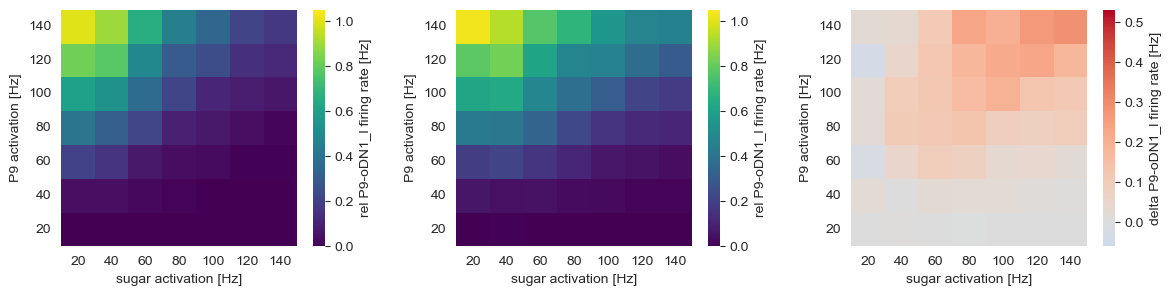

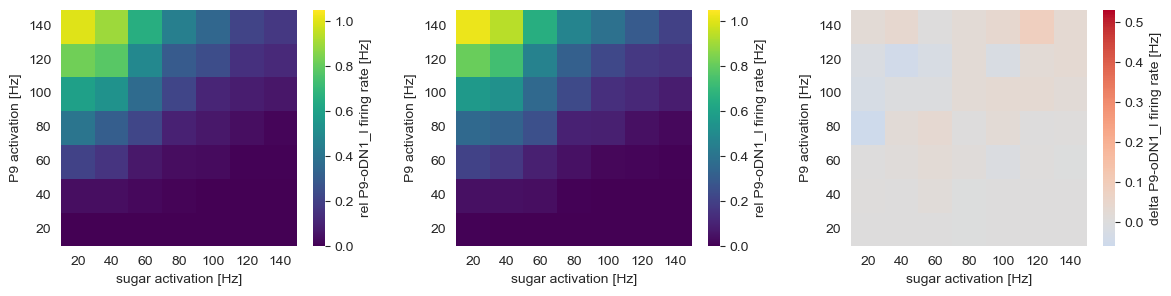

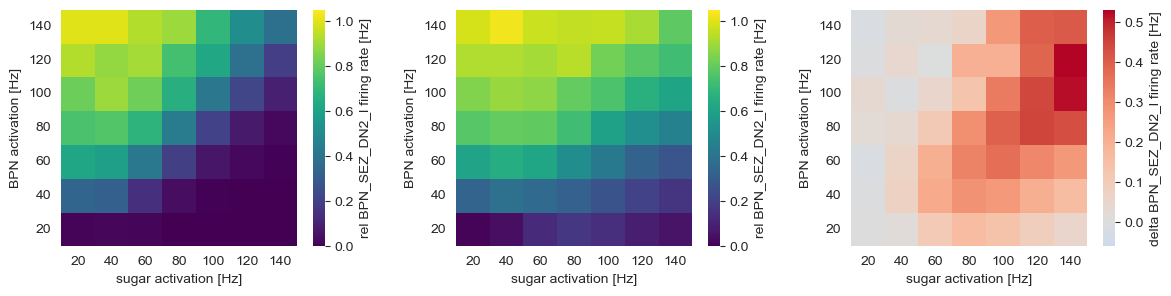

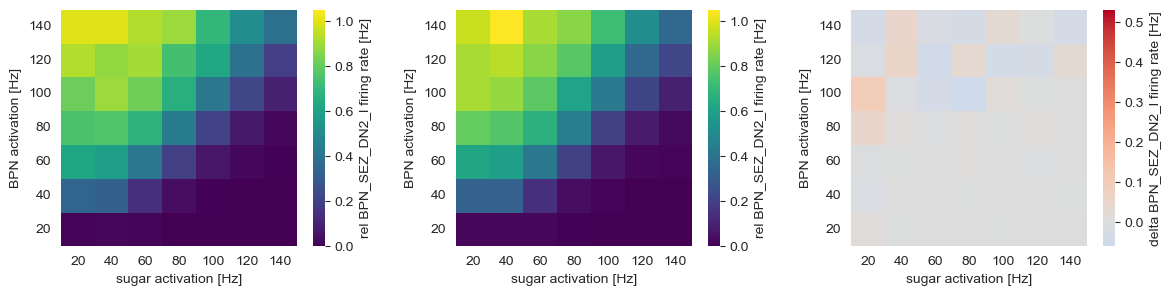

In [4]:
# load raw data, save rates
p_out = Path('./results/figure_5')

fs = [ *range(20, 141, 20) ]

def save_comb(combination, fs, p_out):
    p_prq = p_out / f'rate_{combination}.parquet'
    if p_prq.exists():
        print(f'file {p_prq} already exists, skipping.')
        return
    
    ps = []
    for f1 in fs:
        for f2 in fs:
            n = f'{combination}_{f1}_{f2}.parquet'
            ps.append(p_out / n)

    df_spkt = utl.load_exps(ps)
    df_rate, _ = utl.get_rate(df_spkt, duration=1)    
    df_rate.to_parquet(p_prq)


combination = 'sugarr+p9'
save_comb(combination, fs, p_out)

combination = 'sugarr+p9-fg'
save_comb(combination, fs, p_out)

combination = 'sugarr+p9-bb'
save_comb(combination, fs, p_out)


combination = 'sugarr+bpn'
save_comb(combination, fs, p_out)

combination = 'sugarr+bpn-fg'
save_comb(combination, fs, p_out)

combination = 'sugarr+bpn-bb'
save_comb(combination, fs, p_out)

tcc = [
    ('P9', 'P9-oDN1_l', 'sugarr+p9', 'sugarr+p9-fg'),
    ('P9', 'P9-oDN1_l', 'sugarr+p9', 'sugarr+p9-bb'),
    ('BPN', 'BPN_SEZ_DN2_l', 'sugarr+bpn', 'sugarr+bpn-fg'),
    ('BPN', 'BPN_SEZ_DN2_l', 'sugarr+bpn', 'sugarr+bpn-bb'),
]

df_diff_min, df_diff_max = 0, 0

for name, target1, combination1, combination2 in tcc:

    # construct table for target neuron
    target2 = target1

    df_rate = pd.read_parquet(p_out / f'rate_{combination1}.parquet')
    df_rate = utl.rename_index(df_rate, name2flyid)

    ds = df_rate.loc[target1, :]
    ids = [i for i in ds.index if not ('200' in i or '180' in i or '160' in i) ]
    ds = ds.loc[ids]

    fs1 = [ int(i.split('_')[1]) for i in ds.index ]
    fs2 = [ int(i.split('_')[2]) for i in ds.index ]

    df = pd.pivot_table(
        data=pd.DataFrame(data={
            'r': ds.values,
            'f1': fs1, # sugar activation
            'f2': fs2
    }), values='r', index='f2', columns='f1') # sugar becomes columns

    df = df.sort_index(ascending=False)

    df1 = df
    df_rate = pd.read_parquet(p_out / f'rate_{combination2}.parquet')
    df_rate = utl.rename_index(df_rate, name2flyid)

    ds = df_rate.loc[target2, :]
    ids = [i for i in ds.index if not ('200' in i or '180' in i or '160' in i) ]
    ds = ds.loc[ids]
    fs1 = [ int(i.split('_')[1]) for i in ds.index ]
    fs2 = [ int(i.split('_')[2]) for i in ds.index ]

    df = pd.pivot_table(
        data=pd.DataFrame(data={
            'r': ds.values,
            'f1': fs1, # sugar activation
            'f2': fs2
    }), values='r', index='f2', columns='f1') # sugar becomes columns

    df = df.sort_index(ascending=False)
    df2 = df

    # plot
    fig, axarr = plt.subplots(ncols=3, figsize=(12, 3))

    norm = df1.values.max()
    vmax = np.max([df1.values.max() / norm, df2.values.max() / norm ])
    cmap = 'viridis'
    print(f'{combination2} {target1}: {df1.values.max():1.2f}, {df2.values.max():1.2f}, {vmax:1.2f}')
    ax = axarr[0]
    
    sns.heatmap(ax=ax, data=df1 / norm, cmap=cmap, vmin=0, vmax=1.05, square=True, cbar_kws={'label': f'rel {target1} firing rate [Hz]'})
    ax.set_ylabel(f'{name} activation [Hz]')

    ax = axarr[1]
    sns.heatmap(ax=ax, data=df2 / norm, cmap=cmap, vmin=0, vmax=1.05, square=True, cbar_kws={'label': f'rel {target2} firing rate [Hz]'})
    ax.set_ylabel(f'{name} activation [Hz]')

    ax = axarr[2]
    df_diff = (df2 - df1) / norm
    sns.heatmap(ax=ax, data=df_diff, cmap='coolwarm', center=0, vmin=-.06, vmax=0.53, square=True, cbar_kws={'label': f'delta {target2} firing rate [Hz]'})
    ax.set_ylabel(f'{name} activation [Hz]')
    df_diff_min = np.min([df_diff_min, df_diff.values.min()])
    df_diff_max = np.max([df_diff_max, df_diff.values.max()])

    for ax in axarr:
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        ax.set_xlabel('sugar activation [Hz]')

    fig.tight_layout()
    (p_out / 'plots').mkdir(parents=True, exist_ok=True)
    fig.savefig(p_out / f'plots/{combination2}_{target1}.eps')
    fig.savefig(p_out / f'plots/{combination2}_{target1}.png')

